# Fixation of a New Beneficial Mutation 

How likely is it that a beneficial allele will become fixed in a population where it arises once by mutation?

My hypothesis is that evolution is usually not strong enough of a force to fix new beneficial mutations when they appear. Random events and circumstances means that the beneficial mutation will have a non trivial chance of being lost upon on it's apparence for many reasons. These odds appear even worse when the you consider just the odds of a beneficial mutation in a sperm meeting an ovum.

However I'm only going to explorer what will happen once an individual is born with 1 copy of the beneficial allele.

The main problem I have with the selection model is that is assumes that their are non-discrete number of individuals in the population. Unrealistically infinitesimally small initial proportions of the beneficial allele will always become fixed under these assuptions. 

In very massive populations I hypothesis that when a beneficial mutation arises in *one* individual that individual has a non-trivial chance of not passing on that beneficial allele do to drift. 

Either way, lets run some Monte Carlo simulations based on natural positive selection and drift working together.

**My Simulation's Assuptions:**
- The trait is a simple mendelian traits that can be either dominant, recessive or additive.
- The population size is constant. (^)
- The population is under HWE. (^)
- Mutations cannot increase or decrease the proportion of alleles because the chances of that occuring at the same site twice is assumed to be 0.

(^) Denote assumptions I think maybe too unrealistic to make.

**Note about the simulations**
All simulations start off with only 1 copy of the beneficial allele. Therefore the first individual with the beneficial gene is always heterozygous. 

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline
import DriftAndNaturalSelection as NS

number_of_runs = 2500

## Small Population (10% Selective Advantage, N=250)

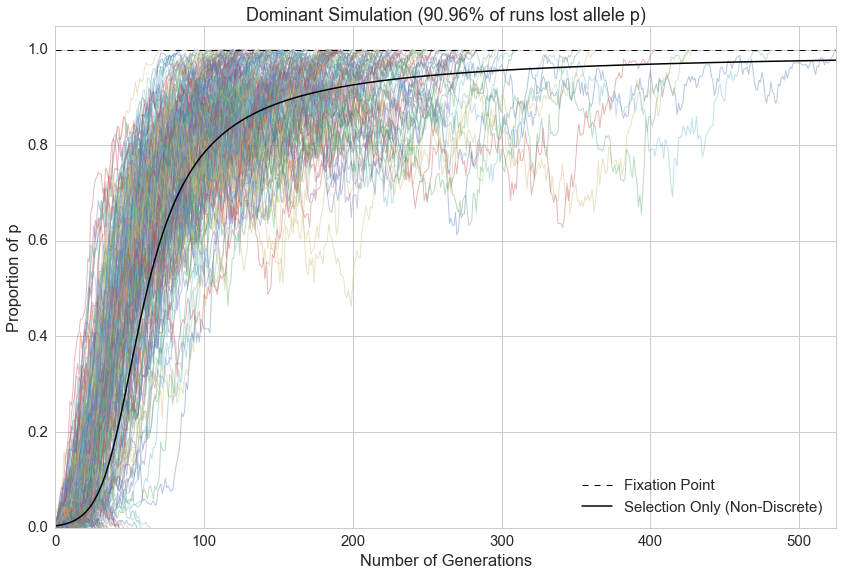

In [3]:
# Dominant Simulation
smallpop_dominant_selection = NS.NSWithDriftSimulation(size_p=1, size_q=249, type_of_trait=NS.DOMINANT)
number_of_generations, number_lost = smallpop_dominant_selection.run(number_of_runs=number_of_runs)

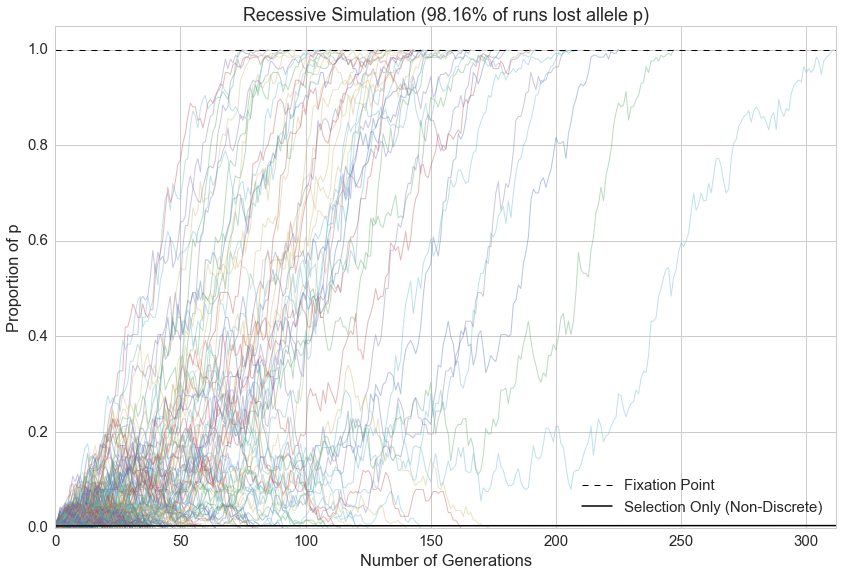

In [4]:
# Recessive Simulation
smallpop_recessive_selection = NS.NSWithDriftSimulation(size_p=1, size_q=249, type_of_trait=NS.RECESSIVE)
number_of_generations, number_lost = smallpop_recessive_selection.run(number_of_runs=number_of_runs)

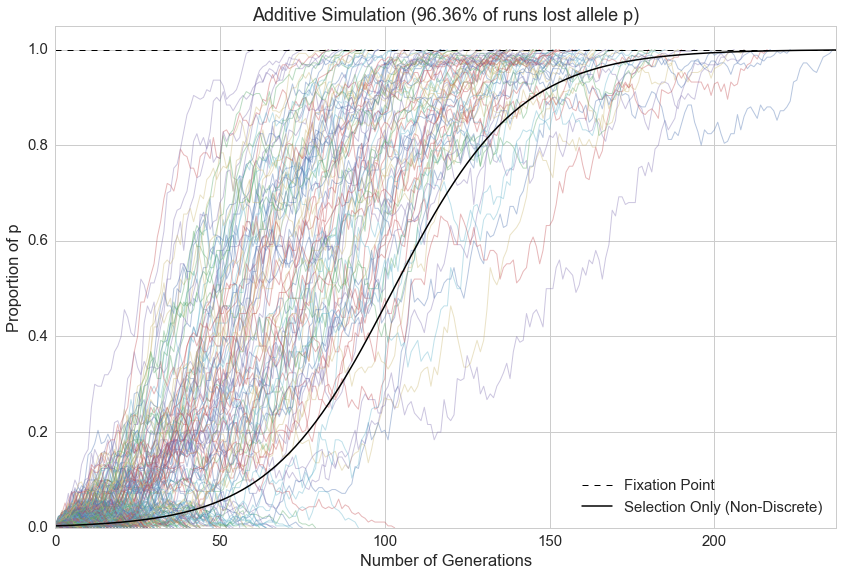

In [5]:
# Additive Simulation
smallpop_additive_selection = NS.NSWithDriftSimulation(size_p=1, size_q=249, type_of_trait=NS.ADDITIVE)
number_of_generations, number_lost = smallpop_additive_selection.run(number_of_runs=number_of_runs)

## Large(ish) Population (10% Selective Advantage, N=6500)

6500 is the number of adult Cheetahs in South Africa where there population is most dense. Why Cheetahs? Because they're pretty cool cats ;)

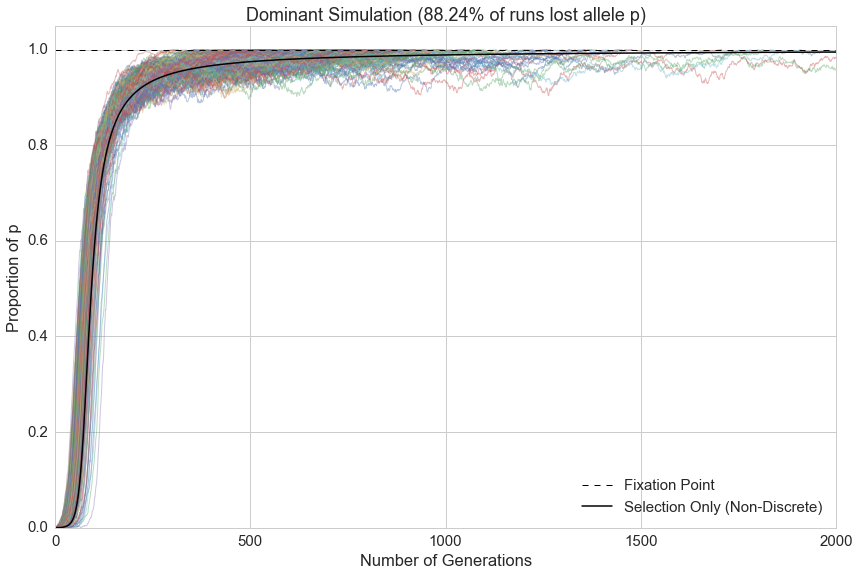

In [6]:
# Dominant Simulation
dominant_selection = NS.NSWithDriftSimulation(size_p=1, size_q=6499, type_of_trait=NS.DOMINANT)
number_of_generations, number_lost = dominant_selection.run(number_of_runs=number_of_runs)

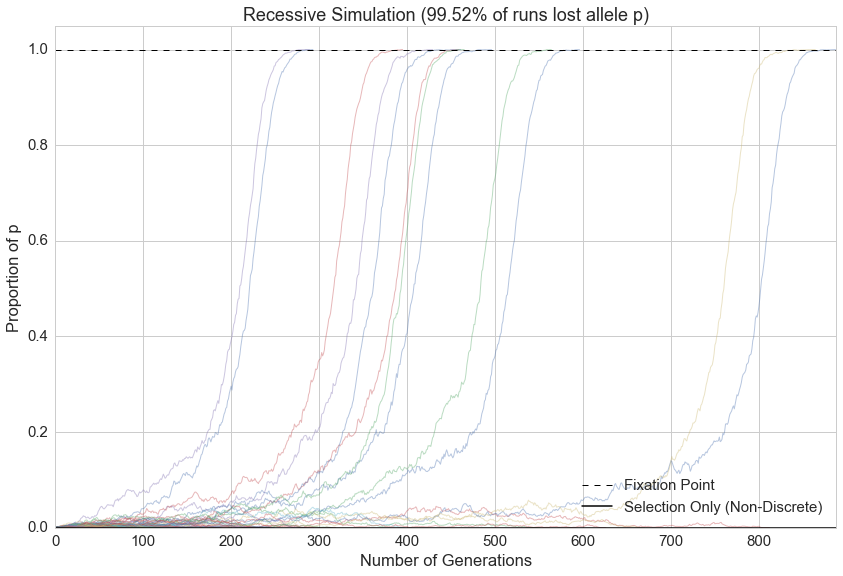

In [7]:
# Recessive Simulation
recessive_selection = NS.NSWithDriftSimulation(size_p=1, size_q=6499, type_of_trait=NS.RECESSIVE)
number_of_generations, number_lost = recessive_selection.run(number_of_runs=number_of_runs)

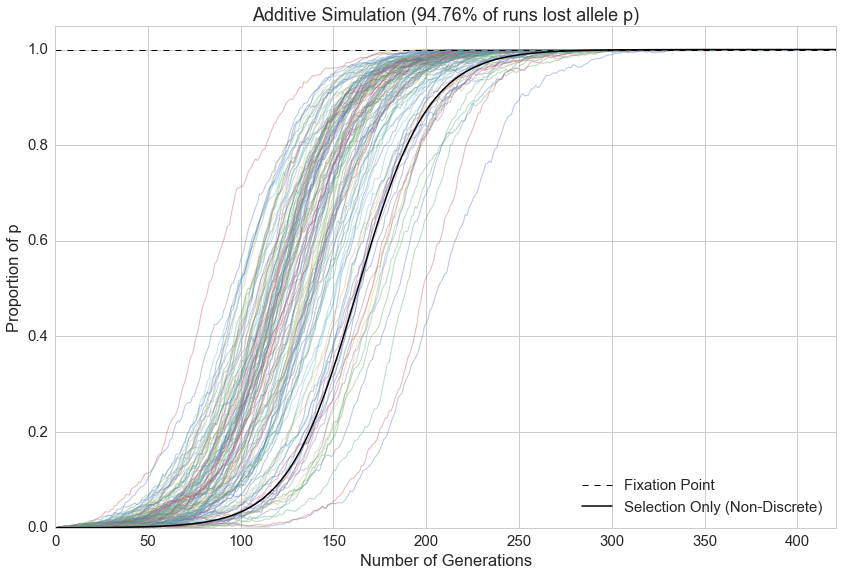

In [8]:
# Additive Simulation
additive_selection = NS.NSWithDriftSimulation(size_p=1, size_q=6499, type_of_trait=NS.ADDITIVE)
number_of_generations, number_lost = additive_selection.run(number_of_runs=number_of_runs)

## What I believe is going on

Drift is driving fixation of the beneficial allele in the wrong direction when the number of individuals with that allele is low. Especially for beneficial recessive alleles drift gets efffectively more chances to remove that allele from the population.

This is because drift has a more dominant effect than selection when the *number* of beneficial alleles are as low as it is.

## About the Recessive allele

All the other simulations came fairly close to the selection only non-discrete model except the recessive simulation. I believe this was because while most of the time the beneficial allele would be lost occassionally extremely rare events would push the number of individuals that would homozygous recessive safely pass where drift has the stronger effect and the more log form of the model kicked in. 

I can demonstrate this by starting off the simulation with a number of copies of allele p is high enough that the probability of the beneficial allele being lost is extremely low, for example **N<sub>p</sub>=1000**

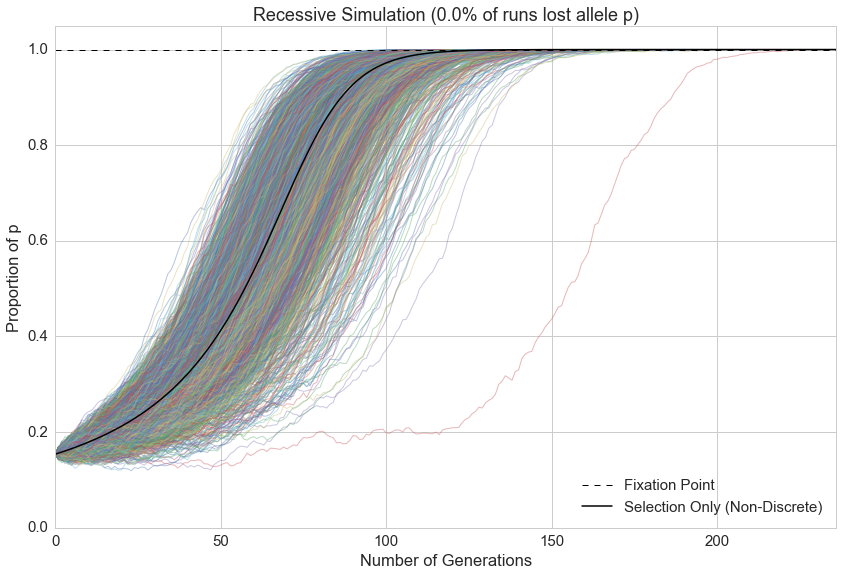

In [9]:
# Try the Cheetah simulation again except that the number of p allele in the gene pool is 650 instead of 1
n_p = 1000
recessive_selection_safe = NS.NSWithDriftSimulation(size_p=n_p, size_q=6500-n_p, type_of_trait=NS.RECESSIVE)
number_of_generations, number_lost = recessive_selection_safe.run(number_of_runs=number_of_runs)

Starting from those conditions all none of the simulations resulted in lose of the beneficial allele and all the runs as a whole seems to track the selection only model well.

## What's the Selection Model Good For?

The selection model shoud be able to make fairly good predictions of the when numbers of a beneficial allele is already high. This could occur, for example, if the environment or circumstance suddenly changes and at a previously neutral or deleterious allele is now advantagous. Since the number would already be relatively high drift will have a smaller effect.

Below is a demonstration of this where **N=100000** and **N<sub>p</sub>=1000**

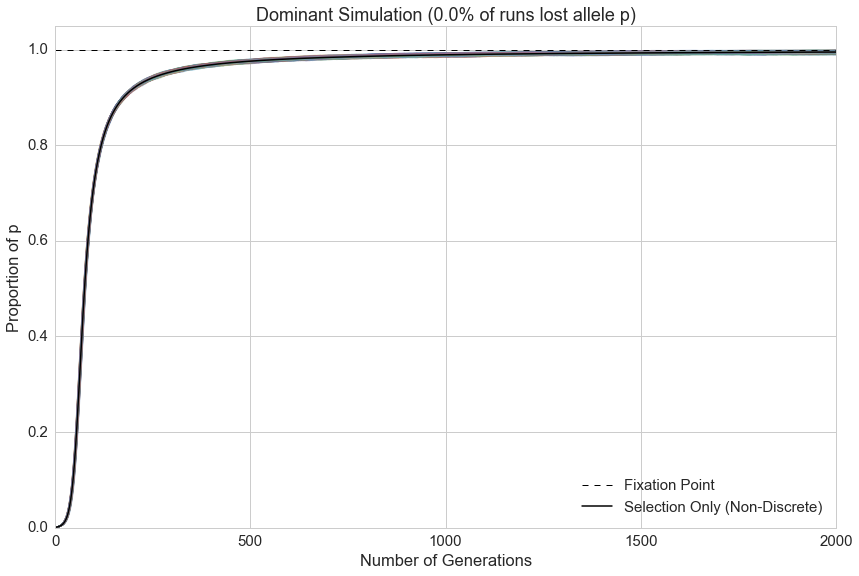

In [11]:
# Dominant, Selective Advantage 10%
n = 1e6
n_p = 1000
dominant_beneficial_sim = NS.NSWithDriftSimulation(size_p=n_p, size_q=n-n_p, type_of_trait=NS.DOMINANT)
_, _ = dominant_beneficial_sim.run(number_of_runs=1000)